## MNIST Classification

### Download MNIST Datasets

In [22]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [23]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [24]:
X, y = mnist['data'], mnist['target']

In [25]:
X.shape

(70000, 784)

In [26]:
y.shape

(70000,)

### View Data

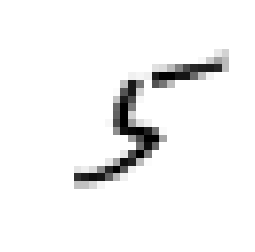

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[35000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [28]:
y[35000]

5.0

### Create Test and Training Data Sets

In [29]:
# The MNIST data set is already split into a training set comprising of the first 60000 images and a 
# test set comprising of the remaining 10000 images

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

#### Shuffle the data

In [30]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classification

In [31]:
# As a starter, we will do binary classification: that of distinguishing whether a digit is a 5 or not

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [32]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=100)
sgd_clf.fit(X_train, y_train_5)

/home/ssikdar/venvs/env3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=100, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [34]:
# Now we can use it for predictions

sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## Performance Measures

### Cross Validation

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=100)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    
    num_correct = sum(y_pred == y_test_folds)
    print(num_correct/len(y_pred))

0.9638
0.96495
0.96585


### Using SKLearn's cross_val_score

#### k-fold cross validation means splitting the training set into k folds, making predicitons and evaluating them on each fold using a model trained on the remaining folds

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9638 ,  0.96495,  0.96585])

In [37]:
# Consider a dumb classifier that classifies every image as not-a-5

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9107 ,  0.91085,  0.9074 ])